## Artificial Intelligence -Natural-Language-Processing (NLP)

**references I use**

[NLTK Book Online](http://www.nltk.org/book/)

[Kaggle Walkthrough](https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-1-for-beginners-bag-of-words)

[SciKit Learn's Tutorial](http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)

Natural Language Processing (NLP) is a field that focuses on enabling computers to understand, interpret, and generate human language. 

It involves the interaction between computers and human language, allowing machines to process, analyze, and derive meaning from text or speech data.

#### NLP techniques enable computers to perform various tasks, including:

**Text Classification:**
Categorizing text into predefined classes or categories.

**Sentiment Analysis:** Determining the sentiment or emotion expressed in a piece of text.

**Named Entity Recognition (NER):**
Identifying and classifying named entities, such as names of people, organizations, locations, etc., in text.

**Machine Translation:**
Translating a text from one language to another.

**Text Generation:**
Creating human-like text, such as chatbots or automated content generation.

**Information Extraction:** Extracting relevant information or facts from unstructured text.

**Question Answering:**
Providing accurate answers to questions posed in natural language.

NLP algorithms and models use various techniques such as **statistical modeling, machine learning, deep learning, and linguistic rules** to process and understand human language, making it a crucial aspect of many applications in fields like virtual assistants, chatbots, sentiment analysis, search engines, and language translation systems.

In [1]:
# first we install NLTK library

!pip install nltk

### Import Libraries

In [2]:
# starting with importing libariraies 

import numpy as np
import pandas as pd

In [3]:
# importing data visualization libraries 

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Get the data 

We'll be using a dataset built in NLTK data sets throw the download_shell() method

In [4]:
import nltk

In [5]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


**I will be using a dataset from the [UCI datasets] from the University of California Irvine, it is the SMS spam collection dataset**

In [6]:
# using rstrip() plus a list comprehension to get a list of all the lines of text messages

messages = [line.rstrip() for line in open('/Users/SharedFiles/AI-Natural-Language-Processing/smsspamcollection/SMSSpamCollection')]
print(len(messages))

5574


A collection of texts is also sometimes called "corpus". Let's print the first ten messages and number them using **enumerate**:

In [7]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

notice that this is a tab-separated values file or (TSV), where the first column is a label saying whether the given message is a normal message commonly referred to as **`HAM`** or **`SPAM`**. The second column is the message itself.



In [8]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

we notice '\t' between columns which confirms that the file is a TSV file. will go and use our panadas knowledge to our advantage. and solve this '\t' issue.

In [9]:

messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',
                           names=["label", "message"])

In [10]:
messages

# should have a data frame with 2 columns of label, message

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
# explor the data more 

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


### Exploratory Data Analysis

checking out the stats with plots and the built-in methods in pandas

I will use **groupby** method to use describe by label, so we can begin to think about the features that separate ham and spam!

In [13]:
messages.groupby('label').describe()

# how many Spam vs How many Ham

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

Now I will follow a technique named **Feature Engineering**.

*Feature engineering involves the extraction and transformation of variables from raw data, such as price lists, product descriptions, and sales volumes so that you can use features for training and prediction*



**We will use this technique to make a new column to detect how long the text messages are**

In [14]:
# using .apply(len) method

messages['length'] = messages['message'].apply(len)

In [15]:
messages

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


### Data Visualization

<Axes: ylabel='Frequency'>

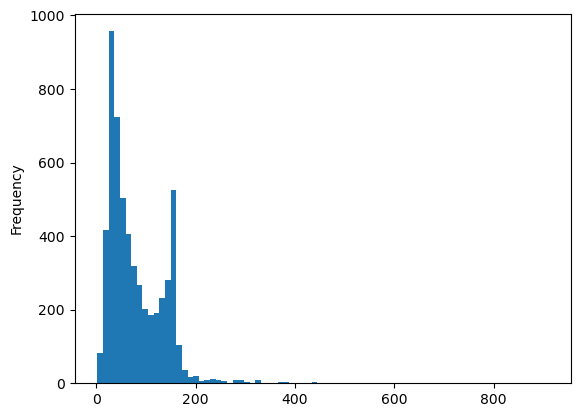

In [16]:
# Let's visualize this

messages['length'].plot.hist(bins=80)

looks like text length may be a good feature to think about. And as we notice the 'x' axis goes all the way up to around '1000', which means there are some pretty long messages.

In [17]:
messages['length'].describe()

# under max we should notice the max values of a large text message

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [18]:
# let's try and find this message 

messages[messages['length'] == 910]


,label,message,length
1085,ham,For me the love should start with attraction.i...,910


In [19]:
# to read the whole message we have to use .iloc() method 

messages[messages['length'] == 910]['message'].iloc[0]

# now you should be able to read the text

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing that comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

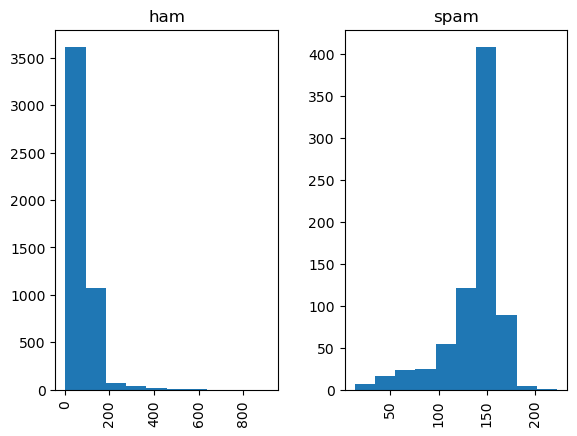

In [20]:
# let's try to visualize more using columns as our axis
# 'length' column on the X-axis and it was separated by the 'label' column

messages.hist(column='length', by='label')

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

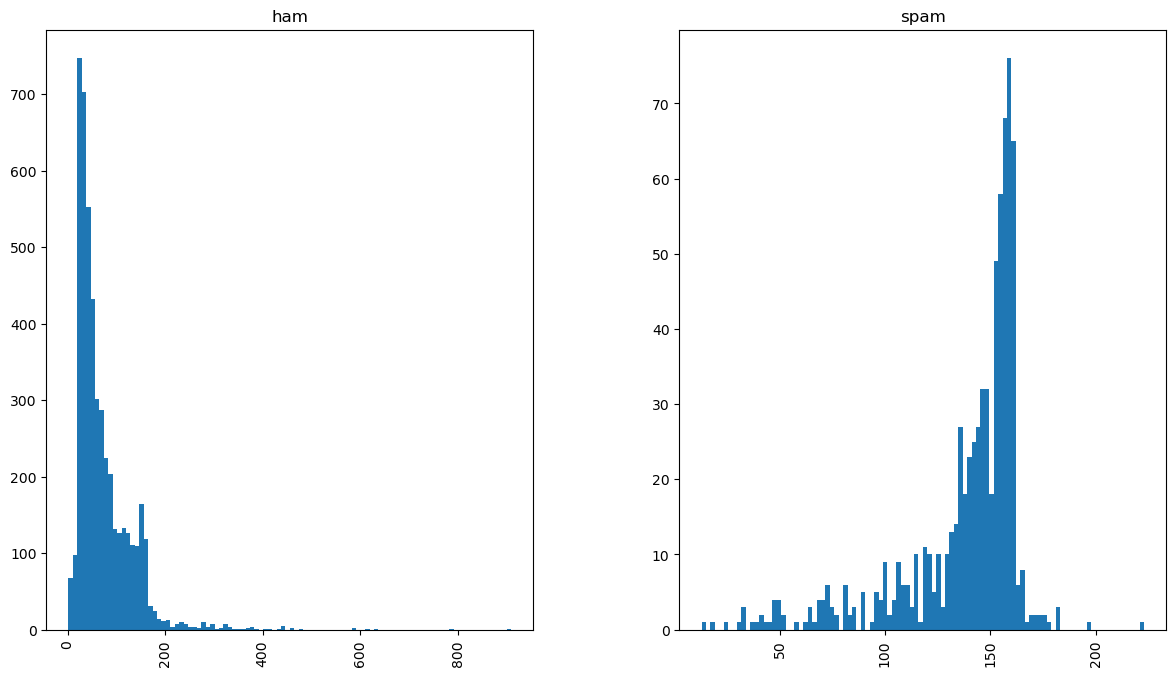

In [21]:
# after adding some arguments 

messages.hist(column='length', by='label', bins=100,figsize=(14,8))

**N: Note that based on those plots, we can notice a trend that spam messages tend to have more characters**

we notice 'ham' messages length average is around 50
while 'spam' messages length average is around 150

### Text Pre-processing

Now let's begin to process the data, the main issue with our data is that it is all in text format (strings).

classification algorithms need numerical feature vectors in order to perform the classification task.To convert a corpus to a vector format we can use **`the bag-of-words`** approach, where each unique word in a text will be represented by one number.

I'll convert the raw messages (sequence of characters) into vectors (sequences of numbers).
    * first function that will split a message into its individual words and return a list.
    * second removing stop words like ('the', 'a', etc..), using NLTK library
    
will create a function to process the string in the message column, and then I will use .apply() in pandas do process all the text in the DataFrame. Also using Python's built-in **string** library to get a quick list of all the possible punctuation

In [22]:
# importing Python's built-in string library

import string

In [23]:
# a sample message

mess = 'Sample message! Notice: it has punctuation.'

In [24]:
# Comprehension 

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Now I use list comprehension in order to pass inn for every character and check if it's not in the 'string punctuation'

In [25]:
# Check characters to see if they are in punctuation
nopunc = [char for char in mess if char not in string.punctuation]

In [26]:
# notice how punctuation marks are removed 

nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [31]:
# Join the characters again to form the string.

nopunc = ''.join(nopunc)

now we work on removing stop words like ('the', 'a', 'an',etc..), by impoting a list of english stopwords from NLTK (check the documentation for more languages and info).

In [32]:
from nltk.corpus import stopwords

In [33]:
# now you see list of English stop wrods

stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [34]:
# now working on splitting our message to a list of elements

nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [35]:
# Now just remove any stopwords
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [37]:
# stop words removed 

clean_mess

['Sample', 'message', 'Notice', 'punctuation']

Now we put both of these together in a functionI will create to apply it to our DataFrame later on

In [38]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [39]:
# now we check our original Dataframe

messages

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


Now we "tokenize" these messages.

**Tokenization** *is a term used to describe the process of converting the normal text strings in to a list of tokens (words that we actually want).



**N: Note that we may get some warnings or errors for symbols we didn't account for or that weren't in Unicode (like a British pound symbol)**

In [40]:
# Check to make sure its working

messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

### Continuing Normalization

   **(Stemming)**

another way to continue normalizing this text is [Stemming]

**Stemming** *is a technique used to reduce an inflected word down to its word stem. For example, the words “programming,” “programmer,” and “programs” can all be reduced down to the common word stem “program.” In other words, “program” can be used as a synonym for the prior three inflection words.

NLTK has lots of built-in tools and great documentation on a lot of these methods.

**some text normalization methods can have trouble with shorthands.**

And you'll notice that we have a lot of shorthands in our messages in our dataframe, So stemming isn't going to work great for our dataset, that's why we skip it to another method.

### Vectorization

after converting messages as lists of tokens (also known as lemmas), will convert each of those messages into a vector the SciKit Learn's algorithm models 

three steps in order to using the bag-of-words model:

    1. Count how many times does a word occur in each message (Known as term frequency)

    2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

    3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)


Each vector will have as many dimensions as there are unique words in the SMS corpus.  

We will first use SciKit Learn's **CountVectorizer**. 

This model will convert a collection of text documents to a matrix of token counts.

we can expect a lot of zero counts, since there are so many messages.  


In [41]:
# strating with 1st step 

from sklearn.feature_extraction.text import CountVectorizer

many arguments and parameters can be passed to the CountVectorizer. In this case will just specify the **analyzer** to be our own previously defined function (text_process)

In [42]:
# might take awhile...based on the messages size 


bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])



In [43]:
# Print total number of vocab words


print(len(bow_transformer.vocabulary_))

11425


now take one text message and get its bag-of-words counts as a vector, putting to use our new `bow_transformer`

In [44]:
# for example 

message7 = messages['message'][6]
print(message7)

Even my brother is not like to speak with me. They treat me like aids patent.


In [46]:
# apply our fucntion on the message we chose 

bow7 = bow_transformer.transform([message7])


In [58]:
# now we print 

print(bow7)
print('\n')
print(bow7.shape)

  (0, 1802)	1
  (0, 4590)	1
  (0, 5193)	1
  (0, 7800)	2
  (0, 8761)	1
  (0, 9971)	1
  (0, 10629)	1


(1, 11425)


it means there are seven unique words in message number 7 (after removing common stop words). one of them appear twice [7800], the rest only once. 

In [51]:
# Let's check and confirm which ones appear twice

print(bow_transformer.get_feature_names_out()[7800])


like


In [52]:
print(message7)

Even my brother is not like to speak with me. They treat me like aids patent.


notice the word 'like' has been repeated twice in this message as the function told us 

useing **.transform()** method on our Bag-of-Words (bow) transformed object and transform the entire DataFrame of messages 




In [59]:
# this process might take some time 

messages_bow = bow_transformer.transform(messages['message'])

In [60]:
# printing reuslts 

print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


In [62]:
# comparing non zero maessages to the total number of messages

sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


### TF-IDF

**TF-IDF stands for Term Frequency-Inverse Document Frequency**

TF-IDF weight measures how important a word is in a document compared to its frequency in a collection(corpus). It helps search engines rank documents based on user queries.

one of the basic ranking functions involves summing the tf-idf values for each term in a query, and more complex ranking methods often build upon this simple concept.

TF-IDF weight combines normalized Term Frequency (TF) and Inverse Document Frequency (IDF) to measure word importance in a document.

**TF: Term Frequency**  measures how often a term appears in a document. To account for document length differences, TF is divided by the total terms in the document:

*TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)*

**IDF: Inverse Document Frequency** gauges term importance. Common terms like "is" are frequent but less important. To balance this, rare terms are emphasized:

*IDF(t) = log_e(Total docs / Docs with term t in it).*

In [63]:
# after counting the term weights and normalization, it is time to use sklearn's TF-IDF

from sklearn.feature_extraction.text import TfidfTransformer

In [64]:
# make an instance of TfidfTransformer

tfidf_transformer = TfidfTransformer()

In [65]:
# now let's fit it to our bad of words

tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [68]:
# using the same message we used beofre 

tfidf7 = tfidf_transformer.transform(bow7)

In [69]:
print (tfidf7)

  (0, 10629)	0.3352766696931058
  (0, 9971)	0.3268691780062757
  (0, 8761)	0.4370099332190581
  (0, 7800)	0.41453906826037096
  (0, 5193)	0.33843411088434017
  (0, 4590)	0.4370099332190581
  (0, 1802)	0.3352766696931058


here we have a inversed document frequency and term frequency relationship for this actual particular message (message7).

basically we were able to interpret these numbers as a weight value for each of these words versus the actual document.

In [74]:
# let's check the inverse document frequency of a particular word
# let's take the word 'hello' as an example 

tfidf_transformer.idf_[bow_transformer.vocabulary_['hello']]

7.8339293183414815

To transform the entire bag-of-words corpus into TF-IDF corpus at once

In [80]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

### Model Training 

at this point, we finally reached that messages represented as numerical vectors, now we can train our spam/ham classifier. 

will be using scikit-learn, choosing the [Naive Bayes]

In [76]:
from sklearn.naive_bayes import MultinomialNB

In [77]:
# making an instance

spam_detector = MultinomialNB()

In [82]:
# fit it

spam_detector = MultinomialNB().fit(messages_tfidf, messages['label'])
# second argument I pass in my actual data



In [83]:
# let's run a message and see what will do

spam_detector.predict((tfidf7)[0])

array(['ham'], dtype='<U4')

it returend to us that the message(7) we have been trying so far is a Ham, let's try and verify that and find out 

In [84]:
messages['label'][7]

'ham'

**here we have matching results**, so our model of predicting Ham vs Spam calssification is runing well

let's try all data 

In [85]:
all_data = spam_detector.predict(messages_tfidf)

In [87]:
# should return an array indicating if our messages were Ham or spam

all_data

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

### Model Evaluation

It's crucial to emphasize that we trained and evaluated everything using the same training data, which isn't ideal.

To accurately measure predictive power, data should be divided into test and training sets. 

training could lead to perfect training data accuracy but fail to classify new messages. As seen before, the proper method is using train-test splitting.

In [88]:
from sklearn.model_selection import train_test_split

In [90]:
msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['label'], test_size=0.2)

In [91]:
# let's check the lengths of our msg_train, msg_test, label_train, label_test

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


The test size is 20% of the entire dataset **(1115 messages out of total 5572)**, and the training is the rest **(4457 out of 5572)**.


### Creating a Data Pipeline

we can run our model again and then predict off the test set by using sklearn's pipeline capabilities to store a pipeline of workflow

it will allow us to set up all the transformations that we will do to the data for future use

In [96]:
# it will be an importan to use in real texts data

from sklearn.pipeline import Pipeline

In [98]:
# making an instance, with arguments 

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [101]:
# might take sometimes, because it has different Pre-processing 

pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7faca82ae830>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [102]:
# now we predict our data 

predictions = pipeline.predict(msg_test)

once we finished predicting, now we will use classification report

In [104]:
from sklearn.metrics import classification_report

In [107]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98       952
        spam       1.00      0.72      0.84       163

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



We've got a classification report for our model on a real test set! Natural Language Processing is vast and worth further exploration through the provided resources.

### - - - - The end - - - -